# 教師なし学習（クラスター → KMeans）

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

make_blobs関数を使って、500個乱数の生成します。下記は生成した乱数をMatplotlibを使ってグラフ化したものです。

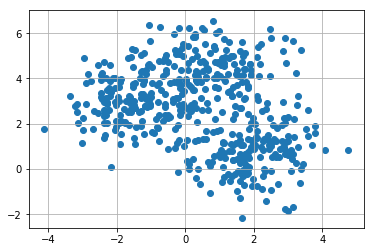

In [2]:
# import make_blobs
from sklearn.datasets import make_blobs

# make dummy data
X,y=make_blobs(n_samples=500, random_state=0)        

plt.scatter(X[:,0],X[:,1])
plt.grid()
plt.show()

KMeansオブジェクトを初期化します。パラメータはinit='random'、n_clusters=3と設定しています。initは設定する初期値です。

In [3]:
#import KMeans
from sklearn.cluster import KMeans

# use kmeans to split data to 3 clusters
kmeans = KMeans(init='random',n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#### 結果の確認

k-meansの学習結果をグラフ化し確認してみましょう。グラフ化には第6章で学んだPandasのテクニックを使います。グラフ化は、クラスター番号ごとにデータを取り出し、色を指定して図示しています。k-means法によって、私たちが期待する通りの3つのグループにデータを分けられていることが確認できます。

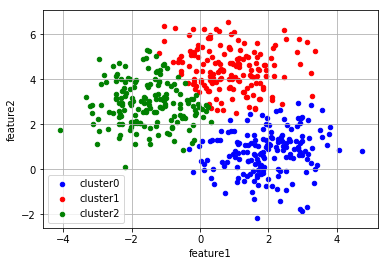

In [4]:
# merge
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

# rename columnames
merge_data.columns = ['feature1','feature2','cluster']

# figure
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                                           label=f'cluster{i}', ax=ax)
    plt.grid(True)